In [1]:
import pandas as pd
import numpy as np
import requests
import json
import os
from bs4 import BeautifulSoup
import tweepy
import io
import warnings
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

Importing the twitter_archives csv file into a dataframe, after downloading it manually.

In [2]:
# ignoring warnings
warnings.filterwarnings('ignore')

twitter_archives = pd.read_csv("D:/Udacity Projects/Data Wrangling Project/twitter-archive-enhanced.csv")

programmatically dowloading the image predictions file using request library

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

Writing the url contents to a file inside the memory and reading the image predictions tsv file

In [5]:
with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('D:/Udacity Projects/Data Wrangling Project/image-predictions.tsv', sep = '\t')

Creating list and add all the tweet IDs to it

In [6]:
tweet_ids_list= list(twitter_archives['tweet_id'])
len(tweet_ids_list)

2356

These are secret tokens that I got from my twitter account so I can use them to query the twitter API

In [7]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)


In [8]:
ids_error = []
start_time = datetime.now()

with open('tweet_json.txt', 'a') as f:
    for tweet_id in tweet_ids_list:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump( tweet._json, f)
            f.write('\n')
            print(tweet_id)
        except:
            ids_error.append(tweet_id)
            print(tweet_id, 'with error')
            
time_elapsed = datetime.now() - start_time
print('Done! Time take is {}'.format(time_elapsed))

892420643555336193 with error
892177421306343426 with error
891815181378084864 with error
891689557279858688 with error
891327558926688256 with error
891087950875897856 with error
890971913173991426 with error
890729181411237888 with error
890609185150312448 with error
890240255349198849 with error
890006608113172480 with error
889880896479866881 with error
889665388333682689 with error
889638837579907072 with error
889531135344209921 with error
889278841981685760 with error
888917238123831296 with error
888804989199671297 with error
888554962724278272 with error
888202515573088257 with error
888078434458587136 with error
887705289381826560 with error
887517139158093824 with error
887473957103951883 with error
887343217045368832 with error
887101392804085760 with error
886983233522544640 with error
886736880519319552 with error
886680336477933568 with error
886366144734445568 with error
886267009285017600 with error
886258384151887873 with error
886054160059072513 with error
8859848000

In [483]:
ids_error

2356

In [12]:
tweets_list = []
with open('D:/Udacity Projects/Data Wrangling Project/tweet-json.txt') as f:
    for tweet_id in tweet_ids_list:
        if tweet_id not in ids_error:
            tweets_list.append(f.readline())

In [ ]:
tweets_list_updated = [i for i in tweets_list if i != '']

In [13]:
tweets_list_updated

[]

In [15]:
count_list = []
for i in tweets_list_updated:
    tweet_id = json.loads(i)['id']
    retweet_count = json.loads(i)['retweet_count']
    favourite_count = json.loads(i)['favorite_count']
    count_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favourite_count': favourite_count})

In [16]:
tweet_counts = pd.DataFrame(count_list, columns = ['tweet_id', 'retweet_count', 'favourite_count'])

In [17]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favourite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
pd.set_option('display.max_colwidth', -1)

### Assess

In [19]:
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

we can see that we have null values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,  retweeted_status_timestamp and expanded_urls columns. I can also see that almost all of these columns are null values. Also, all of the status and user ids are not needed since we have the tweet_id as an identifier. so we can add this as a Tidiness problem. Finally, we can change the tweet_id from being int to a string and the timestamp to be datetime.

In [20]:
twitter_archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
twitter_archives.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [22]:
twitter_archives.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


we can see that some of the results in columns name, doggo, floofer, pupper and puppo are Null values written as 'None'.

In [23]:
pd.set_option('min_rows' , 40)

In [24]:
twitter_archives[twitter_archives.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter

In [25]:
twitter_archives.name.value_counts()

None          745
a             55 
Charlie       12 
Cooper        11 
Lucy          11 
Oliver        11 
Tucker        10 
Penny         10 
Lola          10 
Winston       9  
Bo            9  
Sadie         8  
the           8  
Daisy         7  
Buddy         7  
Toby          7  
an            7  
Bailey        7  
Leo           6  
Oscar         6  
             ..  
Zoe           1  
Gilbert       1  
Rose          1  
Theo          1  
Fido          1  
Emma          1  
Spencer       1  
Lilli         1  
Boston        1  
Brandonald    1  
Corey         1  
Leonard       1  
Beckham       1  
Devón         1  
Gert          1  
Dex           1  
Ace           1  
Tayzie        1  
Grizzie       1  
Christoper    1  
Name: name, Length: 957, dtype: int64

we can also see some of the names has values like 'a', 'the' and 'an'. Also the expanded_urls has a NaN value for the tweet_id 881633300179243008.

we can also see that some numerator values are assigned greater than the denominator values.

In [26]:
twitter_archives.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
2       9  
1       9  
75      2  
15      2  
420     2  
0       2  
80      1  
144     1  
17      1  
26      1  
20      1  
121     1  
143     1  
44      1  
60      1  
45      1  
50      1  
99      1  
204     1  
1776    1  
165     1  
666     1  
27      1  
182     1  
24      1  
960     1  
84      1  
88      1  
Name: rating_numerator, dtype: int64

most of the ratings are from 1-13 where only one or couple are above 15 like 144, 960 and so on. the values seems inaccurate.

In [27]:
twitter_archives.rating_denominator.value_counts()

10     2333
11     3   
50     3   
20     2   
80     2   
70     1   
7      1   
15     1   
150    1   
170    1   
0      1   
90     1   
40     1   
130    1   
110    1   
16     1   
120    1   
2      1   
Name: rating_denominator, dtype: int64

For the denominator we have most of the values 10 but some others are greater or less than 10 which seems inaccurate since the denominator assigned should be 10.

In [28]:
twitter_archives[twitter_archives['rating_numerator'] == 75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


after investigating some of the greater than 10 numbers I found out that one of them which is the 75, is 9.75 in the text so maybe it's a wrong data type problem. Seems that the numerator should be float.

In [29]:
twitter_archives[twitter_archives['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

after investigating some of the texts I found out that some of the comments are mentioning that people are posting images for other stuff rather than dogs. like panda, taco and so on.

In [30]:
twitter_archives.expanded_urls

0       https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                                                                                                                                                
1       https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                                                                                                                                                
2       https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                                                                                                                                                
3       https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                                                                                         

In [31]:
twitter_archives.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

this looks untidy since the html format makes hard to read the url.

Also, we have to change the underscore in the columns names to make it easier to use their names.

In [32]:
image_predictions.head(40)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


after visually assessing the table and checking some of the images in the url, I found that some images are not for dogs.

We can change the numbers in p1_conf, p2_conf and p3_conf to percentages.

In [33]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


I would have to change the tweet_id data type to string instead of int and also remove the underscore of the columns names.

In [34]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
Cardigan                     19 
web_site                     19 
                             .. 
walking_stick                1  
canoe                        1  
trombone                     1  
book_jacket                  1  
rain_barrel                  1  
black-footed_ferret          1  
guenon                       1  
Japanese_spaniel             1  
water_buffalo                1  
maze      

some of the predictions we have are other animals or things rather than dogs.

In [35]:
image_predictions[image_predictions['p1'] == 'web_site']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False


In [36]:
image_predictions[image_predictions['p1'] == 'seat_belt']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat_belt,0.874502,False,golden_retriever,0.055408,True,Labrador_retriever,0.026854,True
235,670427002554466305,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,1,seat_belt,0.952258,False,toy_terrier,0.038872,True,beagle,0.003226,True
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,seat_belt,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True
551,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,0.209213,True
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat_belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True
642,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,seat_belt,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True
657,682303737705140231,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,1,seat_belt,0.997659,False,Lakeland_terrier,0.001731,True,Airedale,0.000204,True
740,687312378585812992,https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg,1,seat_belt,0.703561,False,Great_Dane,0.139909,True,Weimaraner,0.021112,True


after investigating some of the urls here I found out that some of the pictures are not dog pictures. some of them are retweets and some are irrelevant. Also the values in p1, p2 and p3 columns has underscore which should be replaced with a space and the first letter of each word should be capital letter.

In [37]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favourite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


I can join this table with the image_predictions table on the tweet_id and ignore the retweet_count. 

In [38]:
tweet_counts.head(20)

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [39]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favourite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality

#### Twitter Archives Table

* Having retweets and their values.
* Most of the values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns are null and these columns only act as an identifiers.
* Missing values in the expanded_urls column.
* Incorrect data types for tweet_id, timestamp and rating_numerator.
* Inaccurate dog names in the name column.
* NaN values represented by the word 'None' in the dog names.
* Inaccurate values both rating_numerator and rating_denominator columns.
* The source column is untidy due to the URLs format.

#### Image Predictions Table

* Incorrect data type for tweet id.
* The values in the columns p1_conf, p2_conf and p3_conf should be percentages.
* Underscores in stead of spaces in the p1, p2, p3 prediction columns.
* Inconsistent letter cases in the columns p1, p2 and p3.

#### Counts Table

* Incorrect data type for tweet id.

### Tidiness

#### Twitter Archives Table

* The timestamp column: date and time.
* Doggo, floofer, pupper, puppo should be values instead of headers.
* Adding the favourite count column to this table instead of being in the tweet counts table.

#### Image Predictions Table

* Joining this table with the twitter archives table.

## Clean

In [216]:
#making copies of the three tables 
twitter_archives_clean = twitter_archives.copy()
image_predictions_clean = image_predictions.copy()
tweet_counts_clean = tweet_counts.copy()

### Twitter Archives Table

#### Define

Remove all rows with non values in retweeted_status_id to remove all the retweets.

In [217]:
#subsetting the table over all the rows having null values in the retweeted_status_id column
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean.retweeted_status_id.isnull()]

#### Test

In [218]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define

Remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns

#### Code

In [219]:
twitter_archives_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" , "retweeted_status_timestamp"], axis= 1, inplace=True)

#### Test

In [220]:
twitter_archives_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Define

Create a new category type column named dog_type with doggo, floofer, pupper, puppo values. Since the text column has their values so they can be extracted from the text column and then we drop the doggo, floofer, pupper, puppo columns.

#### Code

In [221]:
# creating dog_type column and assign its values
twitter_archives_clean['dog_type'] = twitter_archives_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

#### Test

In [222]:
twitter_archives_clean.dog_type

0       NaN   
1       NaN   
2       NaN   
3       NaN   
4       NaN   
5       NaN   
6       NaN   
7       NaN   
8       NaN   
9       doggo 
10      NaN   
11      NaN   
12       puppo
13      NaN   
14       puppo
15      NaN   
16      NaN   
17      NaN   
18      NaN   
20      NaN   
       ...    
2336    NaN   
2337    NaN   
2338    NaN   
2339    NaN   
2340    NaN   
2341    NaN   
2342    NaN   
2343    NaN   
2344    NaN   
2345    NaN   
2346    NaN   
2347    NaN   
2348    NaN   
2349    NaN   
2350    NaN   
2351    NaN   
2352    NaN   
2353    NaN   
2354    NaN   
2355    NaN   
Name: dog_type, Length: 2175, dtype: object

I can see we have some extra spaces in the dog_type column
#### Code

In [223]:
# removing the sapces from the words 
twitter_archives_clean.dog_type= twitter_archives_clean.dog_type.str.strip()

In [224]:
# changing dog_type to category type
twitter_archives_clean.dog_type= twitter_archives_clean.dog_type.astype('category')

In [225]:
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
twitter_archives_clean.drop(['doggo', 'floofer',
       'pupper', 'puppo'], axis= 1, inplace= True)

#### Test

In [226]:
twitter_archives_clean.dog_type

0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       doggo
10      NaN  
11      NaN  
12      puppo
13      NaN  
14      puppo
15      NaN  
16      NaN  
17      NaN  
18      NaN  
20      NaN  
       ...   
2336    NaN  
2337    NaN  
2338    NaN  
2339    NaN  
2340    NaN  
2341    NaN  
2342    NaN  
2343    NaN  
2344    NaN  
2345    NaN  
2346    NaN  
2347    NaN  
2348    NaN  
2349    NaN  
2350    NaN  
2351    NaN  
2352    NaN  
2353    NaN  
2354    NaN  
2355    NaN  
Name: dog_type, Length: 2175, dtype: category
Categories (4, object): ['doggo', 'floofer', 'pupper', 'puppo']

In [227]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   int64   
 1   timestamp           2175 non-null   object  
 2   source              2175 non-null   object  
 3   text                2175 non-null   object  
 4   expanded_urls       2117 non-null   object  
 5   rating_numerator    2175 non-null   int64   
 6   rating_denominator  2175 non-null   int64   
 7   name                2175 non-null   object  
 8   dog_type            240 non-null    category
dtypes: category(1), int64(3), object(5)
memory usage: 155.3+ KB


#### Define

Change the datatypes of rating_numerator and rating_denominator columns to float, the tweet_id to string and timestamp column to datetime.

#### Code

In [228]:
twitter_archives_clean.rating_numerator = twitter_archives_clean.rating_numerator.astype(float)
twitter_archives_clean.rating_denominator = twitter_archives_clean.rating_denominator.astype(float)
twitter_archives_clean.tweet_id = twitter_archives_clean.tweet_id.astype(str)
twitter_archives_clean.timestamp = pd.to_datetime(twitter_archives_clean.timestamp, yearfirst = True)

#### Test

In [229]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   float64            
 7   name                2175 non-null   object             
 8   dog_type            240 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 155.3+ KB


In [230]:
twitter_archives_clean.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
5      2017-07-29 00:08:17+00:00
6      2017-07-28 16:27:12+00:00
7      2017-07-28 00:22:40+00:00
8      2017-07-27 16:25:51+00:00
9      2017-07-26 15:59:51+00:00
10     2017-07-26 00:31:25+00:00
11     2017-07-25 16:11:53+00:00
12     2017-07-25 01:55:32+00:00
13     2017-07-25 00:10:02+00:00
14     2017-07-24 17:02:04+00:00
15     2017-07-24 00:19:32+00:00
16     2017-07-23 00:22:39+00:00
17     2017-07-22 16:56:37+00:00
18     2017-07-22 00:23:06+00:00
20     2017-07-20 16:49:33+00:00
                  ...           
2336   2015-11-16 15:14:19+00:00
2337   2015-11-16 14:57:41+00:00
2338   2015-11-16 04:02:55+00:00
2339   2015-11-16 03:55:04+00:00
2340   2015-11-16 03:44:34+00:00
2341   2015-11-16 03:22:39+00:00
2342   2015-11-16 02:38:37+00:00
2343   2015-11-16 01:59:36+00:00
2344   2015-11-16 01:52:02+00:00
2345   201

#### Define

Join tables twitter_archives_clean with tweet_counts_clean

In [231]:
# changing the tweet_id type to object before merging the two tables
tweet_counts_clean.tweet_id= tweet_counts_clean.tweet_id.astype(str)
twitter_archives_clean= pd.merge(twitter_archives_clean, tweet_counts_clean, on = 'tweet_id', how= "left")

#### Test

In [232]:
twitter_archives_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_type',
       'retweet_count', 'favourite_count'],
      dtype='object')

In [233]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   float64            
 7   name                2175 non-null   object             
 8   dog_type            240 non-null    category           
 9   retweet_count       2175 non-null   int64              
 10  favourite_count     2175 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 189.2+ KB

#### Define

Merge the twitter_archives_clean table with image_predictions_clean table and make it inner join to avoid the retweets. Also remove the unnecessary data.

#### Code

In [234]:
# changing the tweet_id type to object before merging the two tables
image_predictions_clean.tweet_id= image_predictions_clean.tweet_id.astype(str)

twitter_archives_clean= twitter_archives_clean.merge(image_predictions_clean, on ='tweet_id', how= 'inner')

In [235]:
#dropping the unnecessary columns
twitter_archives_clean = twitter_archives_clean.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

In [236]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   float64            
 6   rating_denominator  1994 non-null   float64            
 7   name                1994 non-null   object             
 8   dog_type            216 non-null    category           
 9   retweet_count       1994 non-null   int64              
 10  favourite_count     1994 non-null   int64              
 11  jpg_url             1994 non-null   object             
 12  p1                  1994 non-null 

#### Define

Make the source column in the twitter_archives_clean table more readable.

#### Code

In [237]:
twitter_archives_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [238]:
# since the column has only 3 different values, we will assigning each value to a variable  
iPhone_var = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
WebClient_var = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
TweetDeck_var = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [239]:
# replace the unreadable text with a clear text 
twitter_archives_clean.source = twitter_archives_clean.source.replace(iPhone_var, 'Twitter for iPhone')
twitter_archives_clean.source = twitter_archives_clean.source.replace(WebClient_var, 'Twitter Web Client')
twitter_archives_clean.source = twitter_archives_clean.source.replace(TweetDeck_var, 'TweetDeck')

#### Test

In [240]:
twitter_archives_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

#### Define

Create two columns 'date' and 'time' instead of the timestamp column.

#### Code

In [241]:
# extracting the date and time information from timestamp column
twitter_archives_clean['date'] = twitter_archives_clean['timestamp'].apply(lambda x: x.strftime('%d-%m-%Y'))
twitter_archives_clean['time'] = twitter_archives_clean['timestamp'].apply(lambda x: x.strftime('%H:%M:%S'))

# dropping the timestamp column
twitter_archives_clean = twitter_archives_clean.drop('timestamp', axis = 1)

#### Test

In [242]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1994 non-null   object  
 1   source              1994 non-null   object  
 2   text                1994 non-null   object  
 3   expanded_urls       1994 non-null   object  
 4   rating_numerator    1994 non-null   float64 
 5   rating_denominator  1994 non-null   float64 
 6   name                1994 non-null   object  
 7   dog_type            216 non-null    category
 8   retweet_count       1994 non-null   int64   
 9   favourite_count     1994 non-null   int64   
 10  jpg_url             1994 non-null   object  
 11  p1                  1994 non-null   object  
 12  p1_conf             1994 non-null   float64 
 13  p1_dog              1994 non-null   bool    
 14  date                1994 non-null   object  
 15  time                1994 non-null   ob

#### Code

In [243]:
# convert the date column to datetime
twitter_archives_clean.date = pd.to_datetime(twitter_archives_clean.date, dayfirst = True)

#### Test

In [244]:
twitter_archives_clean.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favourite_count,jpg_url,p1,p1_conf,p1_dog,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,2017-08-01,16:23:56


#### Define

* Rename 'jpg_url', 'p1', 'p1_conf':, 'p1_dog' columns.
* Convert the proportions in the p1 column into percentages.
* Capitalize the first letter of every word in the p1 column.
* Replace the underscores in the p1 column by spaces.

#### Code

In [245]:
# renaming the columns
twitter_archives_clean = twitter_archives_clean.rename({'jpg_url': 'image_url', 'p1':'predictions', 
                                                        'p1_conf': 'percentage_of_confidence', 'p1_dog': 'predicted_breed'},
                                                       axis = 'columns')

In [246]:
# changing the values from proportions to percentages
twitter_archives_clean.percentage_of_confidence = twitter_archives_clean.percentage_of_confidence.apply(lambda x: round(x*100, 2))

In [247]:
# capitalizing the first letter of each word
twitter_archives_clean.predictions = twitter_archives_clean.predictions.str.title()

In [248]:
#replacing the underscores in the prediction column by spaces
twitter_archives_clean.predictions = twitter_archives_clean.predictions.str.replace('_', ' ')

#### Test

In [249]:
twitter_archives_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favourite_count,image_url,predictions,percentage_of_confidence,predicted_breed,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,9.70,False,2017-08-01,16:23:56
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32.36,True,2017-08-01,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,71.60,True,2017-07-31,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,17.03,False,2017-07-30,15:58:51
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,55.57,True,2017-07-29,16:00:24


#### Define

* Replace the wrong values in the rating_numerator column, where the numbers before the decimal were corrupted, with the right values in the text column.

* Replace the wrong values in the rating_denominator column with the right values in the text column.

#### Code

In [250]:
# extracting the floating numbers from the text and assigning them to a variable
right_values_nom = twitter_archives_clean[twitter_archives_clean.text.str.contains('(\d+\.\d+\/)')].text.str.extract('(\d+\.\d+)')

In [251]:
# assiging the right values to the rating_numerator column
twitter_archives_clean.loc[right_values.index, 'rating_numerator'] = right_values_nom.values

In [252]:
# creating list of the data frame indexes
all_indices = twitter_archives_clean.index.tolist()

# extracting the right denominator values from the text column
q= twitter_archives_clean[twitter_archives_clean.text.str.contains('(/\d+)')].text.str.extract('(/\d+)')

# creating a loop to assign the right values to the denominator column
for i in all_indices:
    twitter_archives_clean.loc[i, 'rating_denominator'] = q.values[i][0][1:]

In [253]:
# converting them to float again
twitter_archives_clean.rating_numerator = twitter_archives_clean.rating_numerator.astype(float)
twitter_archives_clean.rating_denominator = twitter_archives_clean.rating_denominator.astype(float)

#### Test

In [255]:
twitter_archives_clean[twitter_archives_clean.text.str.contains('(\d+\.\d+\/)')]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favourite_count,image_url,predictions,percentage_of_confidence,predicted_breed,date,time
39,883482846933004288,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,NaN,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,Golden Retriever,94.31,True,2017-07-08,00:28:19
503,786709082849828864,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,NaN,7069,20296,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,46.73,True,2016-10-13,23:23:56
553,778027034220126208,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,NaN,1885,7320,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,Clumber,94.67,True,2016-09-20,00:24:34
1374,680494726643068929,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,None,NaN,542,1879,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,Kuvasz,43.86,True,2015-12-25,21:06:00


In [256]:
twitter_archives_clean[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10.0
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10.0
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10.0
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13.0,10.0
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10.0


#### Define

Replace the incorrect dog names with the correct ones from the text column. Also replace the remaining 'None' in the name column by NaN values.

#### Code

In [257]:
# filtering out rows where the name is in lowercase and the word 'named' exists in the text.
# That's where most of the names are incorrect
indexes= twitter_archives_clean[twitter_archives_clean.name.str.islower() 
                              & twitter_archives_clean.text.str.contains('named')].index.tolist()

all_indices = twitter_archives_clean.index.tolist()
for i in all_indices:
    if i in indexes:
        #finding the position of the word 'named' in the text
        pos= twitter_archives_clean[twitter_archives_clean.index == i].text.tolist()[0].find('named') 
        
        # extract the first word after the word 'named'
        x = twitter_archives_clean[twitter_archives_clean.index == i].text.str[pos+6:].str.extract(r'([A-Z][a-z]+)',
                                                                                                   expand = True)[0]
        twitter_archives_clean.loc[twitter_archives_clean.index == i, 'name'] = x #assign the new name

In [258]:
# filtering out rows where the column name has the word 'None' and the column text has the word 'named'.
indexes= twitter_archives_clean[(twitter_archives_clean.name == 'None')
                              & (twitter_archives_clean.text.str.contains('named'))].index.tolist()

all_indices = twitter_archives_clean.index.tolist()
for i in all_indices:
    if i in indexes:
        #finding the position of the word 'named' in the text
        pos= twitter_archives_clean[twitter_archives_clean.index == i].text.tolist()[0].find('named') 
        
        # extract the first word after the word 'named'
        x = twitter_archives_clean[twitter_archives_clean.index == i].text.str[pos+6:].str.extract(r'([A-Z][a-z]+)',
                                                                                                   expand = True)[0]
        twitter_archives_clean.loc[twitter_archives_clean.index == i, 'name'] = x #assign the new name

In [259]:
#replacing the remaining 'None's in the name column by NaN values
twitter_archives_clean.name = twitter_archives_clean.name.replace('None', np.nan)

#### Test

In [261]:
twitter_archives_clean[twitter_archives_clean.name == 'None']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favourite_count,image_url,predictions,percentage_of_confidence,predicted_breed,date,time


In [262]:
twitter_archives_clean[twitter_archives_clean.text.str.contains('named')]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favourite_count,image_url,predictions,percentage_of_confidence,predicted_breed,date,time
1503,675706639471788032,Twitter for iPhone,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10.0,10.0,Wylie,NaN,106,693,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,English Springer,99.03,True,2015-12-12,15:59:51
1600,673636718965334016,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10.0,10.0,Kip,NaN,404,1194,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,Wombat,88.03,False,2015-12-06,22:54:44
1679,671743150407421952,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11.0,10.0,Jacob,NaN,248,779,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,Toy Poodle,41.94,True,2015-12-01,17:30:22
1710,671147085991960577,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9.0,10.0,Rufus,NaN,254,713,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,Yorkshire Terrier,46.72,True,2015-11-30,02:01:49
1760,670427002554466305,Twitter for iPhone,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9.0,10.0,Spork,NaN,179,551,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,Seat Belt,95.23,False,2015-11-28,02:20:27
1769,670361874861563904,Twitter for iPhone,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9.0,10.0,Cherokee,NaN,71,344,https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg,Platypus,97.41,False,2015-11-27,22:01:40
1772,670303360680108032,Twitter for iPhone,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9.0,10.0,Hemry,NaN,151,452,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,Shetland Sheepdog,38.03,True,2015-11-27,18:09:09
1790,669923323644657664,Twitter for iPhone,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10.0,10.0,Alphred,NaN,64,250,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,Car Mirror,34.31,False,2015-11-26,16:59:01
1804,669564461267722241,Twitter for iPhone,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10.0,10.0,Alfredo,NaN,133,413,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,Toy Poodle,62.37,True,2015-11-25,17:13:02
1809,669363888236994561,Twitter for iPhone,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,https://twitter.com/dog_rates/status/669363888236994561/photo/1,10.0,10.0,Zeus,NaN,252,669,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,Golden Retriever,53.90,True,2015-11-25,03:56:01


### Image predictions table

#### Define

Replace the underscores with spaces in the p1, p2 and p3 columns.

#### Code

In [263]:
# Replace underscores with spaces.
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace('_',' ')
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace('_',' ')
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace('_',' ')

#### Test

In [264]:
image_predictions_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater Swiss Mountain dog
6,box turtle,mud turtle,terrapin
7,chow,Tibetan mastiff,fur coat
8,shopping cart,shopping basket,golden retriever
9,miniature poodle,komondor,soft-coated wheaten terrier


#### Define

Change the column's tweet_id datatype to string

#### Code

In [265]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [266]:
image_predictions_clean.dtypes

tweet_id    object 
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

#### Define

Convert the columns p1_conf, p2_conf and p3_conf from proportions to percentages.

#### Code

In [267]:
# multiplying each value by 100 to get the percentages and round them to 2 decimal places.
image_predictions_clean.p1_conf = image_predictions_clean.p1_conf.apply(lambda x: round(x*100, 2))
image_predictions_clean.p2_conf = image_predictions_clean.p2_conf.apply(lambda x: round(x*100, 2))
image_predictions_clean.p3_conf = image_predictions_clean.p3_conf.apply(lambda x: round(x*100, 2))

#### Test

In [268]:
image_predictions_clean[['p1_conf', 'p2_conf', 'p3_conf']]

,p1_conf,p2_conf,p3_conf
0,46.51,15.67,6.14
1,50.68,7.42,7.20
2,59.65,13.86,11.62
3,40.81,36.07,22.28
4,56.03,24.37,15.46
5,65.11,26.38,1.62
6,93.30,4.59,1.79
7,69.25,5.83,5.44
8,96.25,1.46,0.80
9,20.15,19.23,8.21


#### Define

Capitalizing the first letter of every word in the columns p1, p2 and p3.

#### Code

In [269]:
# using str.title to capitalize the first letter of each word
image_predictions_clean.p1 = image_predictions_clean.p1.str.title()
image_predictions_clean.p2 = image_predictions_clean.p2.str.title()
image_predictions_clean.p3 = image_predictions_clean.p3.str.title()

#### Test

In [270]:
image_predictions_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-Coated Wheaten Terrier


#### Define

Change the column names of jpg_url, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog to make them better to understand.

#### Code

In [271]:
image_predictions_clean = image_predictions_clean.rename({'jpg_url': 'image_url', 'p1': '1st_prediction',
                                                          'p1_conf': '1st_confidence_percent', 
                                                          'p1_dog': '1st_breed_predicted',
                                                          'p2': '2nd_prediction', 
                                                          'p2_conf': '2nd_confidence_percent',
                                                          'p2_dog': '2nd_breed_predicted', 
                                                          'p3': '3rd_prediction',
                                                          'p3_conf': '3rd_confidence_percent', 
                                                          'p3_dog': '3rd_breed_predicted'},
                                                         axis = 'columns')

#### Test

In [272]:
image_predictions_clean.head()

,tweet_id,image_url,img_num,1st_prediction,1st_confidence_percent,1st_breed_predicted,2nd_prediction,2nd_confidence_percent,2nd_breed_predicted,3rd_prediction,3rd_confidence_percent,3rd_breed_predicted
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,46.51,True,Collie,15.67,True,Shetland Sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,50.68,True,Miniature Pinscher,7.42,True,Rhodesian Ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,59.65,True,Malinois,13.86,True,Bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,40.81,True,Redbone,36.07,True,Miniature Pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True


### Tweet counts Table

#### Define

Change tweet_id column's datatype to string type.

#### Code

In [273]:
tweet_counts_clean.tweet_id = tweet_counts_clean.tweet_id.astype(str)

#### Test

In [280]:
tweet_counts_clean.dtypes

tweet_id           object
retweet_count      int64 
favourite_count    int64 
dtype: object

## Storing Data

Storing the cleaned dataframes to a CSV files

In [281]:
twitter_archives_clean.to_csv('twitter_archive_master.csv', index = False)
image_predictions_clean.to_csv('image_predicitons_master.csv', index = False)
tweet_counts_clean.to_csv('tweet_counts_master.csv', index = False)

## Analyzing and Visualizing Data

In [354]:
# reading the stored file
twitter_archives_final = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')

In [355]:
twitter_archives_final

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favourite_count,image_url,predictions,percentage_of_confidence,predicted_breed,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,9.70,False,2017-08-01,16:23:56
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32.36,True,2017-08-01,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,71.60,True,2017-07-31,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,17.03,False,2017-07-30,15:58:51
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,55.57,True,2017-07-29,16:00:24
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay Retriever,42.56,True,2017-07-29,00:08:17
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,NaN,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,34.17,True,2017-07-28,16:27:12
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,NaN,NaN,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,56.61,True,2017-07-28,00:22:40
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,NaN,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish Terrier,48.76,True,2017-07-27,16:25:51
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10.0,Cassie,doggo,7

In [356]:
twitter_archives_final.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favourite_count,percentage_of_confidence
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.237101,10.532096,2766.753260,8895.725677,59.394228
std,6.747816e+16,41.471197,7.320710,4674.698447,12213.193181,27.195399
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,4.430000
25%,6.758475e+17,10.000000,10.000000,624.750000,1982.000000,36.282500
50%,7.084748e+17,11.000000,10.000000,1359.500000,4136.000000,58.765000
75%,7.877873e+17,12.000000,10.000000,3220.000000,11308.000000,84.627500
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,100.000000


Here we can see that the mean values for the retweet_count, favourite_count and percentage_of_confidence to be approximately 2766, 8895 and 59.4 respectively

In [357]:
twitter_archives_final.predicted_breed.mean()

0.7407221664994985

74% of the dogs' breeds were predicted.

In [364]:
twitter_archives_final.groupby('predicted_breed')['percentage_of_confidence'].mean()

predicted_breed
False    53.559691
True     61.436513
Name: percentage_of_confidence, dtype: float64

that's the mean level of confidence to predict the breeds. looks like the model was more confidence when the prediction was a dog breed.

In [371]:
# separating the data into two parts one has the dogs were their breeds were predicted
# and the other where the breeds were unpredicted
predicted_breeds= twitter_archives_final[twitter_archives_final.predicted_breed == True]
unpredicted_breeds= twitter_archives_final[twitter_archives_final.predicted_breed == False]

In [369]:
predicted_breeds.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favourite_count,percentage_of_confidence
count,1.477000e+03,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,7.406665e+17,11.506283,10.534868,2790.399458,9288.481381,61.436513
std,6.860818e+16,7.690285,6.849696,4763.557005,12593.129577,26.034166
min,6.660209e+17,1.000000,2.000000,16.000000,81.000000,4.430000
25%,6.782555e+17,10.000000,10.000000,656.000000,2232.000000,39.210000
50%,7.152202e+17,11.000000,10.000000,1443.000000,4503.000000,61.570000
75%,7.954003e+17,12.000000,10.000000,3261.000000,11746.000000,85.320000
max,8.921774e+17,165.000000,150.000000,79515.000000,132810.000000,100.000000


In [370]:
unpredicted_breeds.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favourite_count,percentage_of_confidence
count,5.170000e+02,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.220930e+17,14.324952,10.524178,2699.199226,7773.675048,53.559691
std,6.217893e+16,80.422183,8.531627,4414.747724,10990.395594,29.526043
min,6.660519e+17,0.000000,10.000000,34.000000,108.000000,5.900000
25%,6.728844e+17,8.000000,10.000000,584.000000,1513.000000,27.590000
50%,6.909326e+17,10.000000,10.000000,1135.000000,3172.000000,47.860000
75%,7.588547e+17,12.000000,10.000000,2882.000000,9433.000000,82.160000
max,8.924206e+17,1776.000000,170.000000,37911.000000,75639.000000,100.000000


The mean average of all factores is higher in th predicted breeds table except the rating_numerator factor

In [359]:
predicted_breeds.predictions.value_counts().head(5)

Golden Retriever      139
Labrador Retriever    95 
Pembroke              88 
Chihuahua             79 
Pug                   54 
Name: predictions, dtype: int64

These are the top 5 breeds being predicted from the pictures.

In [360]:
predicted_breeds.groupby('predictions')['retweet_count'].mean().sort_values(ascending = False).head(5)

predictions
Standard Poodle     6631.857143
Afghan Hound        5976.000000
English Springer    5973.555556
Saluki              5133.750000
Eskimo Dog          4768.888889
Name: retweet_count, dtype: float64

These are the highest 5 breeds with mean retweet count. They are completely different than the most common breeds being predicted.

In [361]:
predicted_breeds.groupby('predictions')['favourite_count'].mean().sort_values(ascending = False).head(5)

predictions
Saluki                     24060.000000
French Bulldog             17913.000000
Afghan Hound               17326.666667
Black-And-Tan Coonhound    17012.000000
Flat-Coated Retriever      16791.625000
Name: favourite_count, dtype: float64

these are the highest 5 breeds when it comes to the favorite count. Only Afghan Hound is common with the previous list.

In [366]:
(predicted_breeds.groupby('predictions')['rating_numerator', 'favourite_count',
                                       'retweet_count'].mean()).sort_values(by = 'rating_numerator', 
                                                                            ascending = False).head(5)

,rating_numerator,favourite_count,retweet_count
predictions,,,
Soft-Coated Wheaten Terrier,25.454545,2285.363636,813.000000
West Highland White Terrier,15.642857,6506.000000,1554.214286
Great Pyrenees,14.928571,12932.000000,4732.285714
Borzoi,14.444444,6217.444444,1936.444444
Labrador Retriever,13.905263,11830.000000,3859.810526


These are the top 5 predictions with the highest rating and their coresponding favourite and retweet counts

In [367]:
(predicted_breeds.groupby('dog_type')['rating_numerator', 'favourite_count',
                                       'retweet_count'].mean()).sort_values(by = 'rating_numerator', 
                                                                            ascending = False).head(5)

,rating_numerator,favourite_count,retweet_count
dog_type,,,
floofer,12.500000,17721.000000,3545.000000
puppo,12.125000,22800.416667,6662.208333
doggo,11.675676,19046.216216,7411.189189
pupper,11.000000,7835.450980,2455.245098


These are the 4 dog types with their corresponding ratings, favourite counts and retweet counts. We can see that the floofer is the highest rate and the pupper is the lowest.

While the puppo being the most favorite and the doggo having the highest retweets.

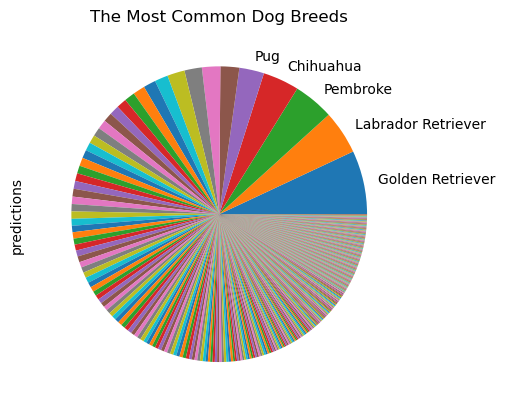

In [403]:
labels= list(twitter_archives_final.predictions.value_counts().keys())
len_= len(twitter_archives_final.predictions.value_counts().keys())
for i in range(len_-5):
    labels[5+i]= ""
twitter_archives_final.predictions.value_counts().plot(kind = 'pie', labels = labels)

plt.title('The Most Common Dog Breeds');

This Pie Chart shows us the most common dog breeds and their sizes in comparison with the rest of the breeds. The 5 breeds combined represent approximately 25% of the total breeds.

### Sources

* https://regexone.com/lesson/line_beginning_end
* https://www.freecodecamp.org/news/python-lambda-function-explained/
* https://github.com/Mitul2991/Udacity-Project---Wrangling-and-analyzing-data-from-twitter-archives/blob/master/wrangle_act.ipynb